## Loading-Data

In [98]:
# Importing modules
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [99]:
df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')
df.head()

c:\Users\mutis\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [100]:
# Getting more info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

We notice some missing values on various columns

### Data-Cleaning

#### Handling missing values

Checking the percentage of missing data

In [101]:
def missing_values():
    """Function to check missing data in df
    
    Returns: (pd.Series) a series of the missing values as percentages
    """
    return df.isna().mean().sort_values(ascending=False)


missing_values()

Schedule                  0.858453
Air.carrier               0.812710
FAR.Description           0.639742
Aircraft.Category         0.636772
Longitude                 0.613304
Latitude                  0.613203
Airport.Code              0.434699
Airport.Name              0.406113
Broad.phase.of.flight     0.305606
Publication.Date          0.154924
Total.Serious.Injuries    0.140737
Total.Minor.Injuries      0.134246
Total.Fatal.Injuries      0.128261
Engine.Type               0.079616
Report.Status             0.071786
Purpose.of.flight         0.069660
Number.of.Engines         0.068445
Total.Uninjured           0.066510
Weather.Condition         0.050535
Aircraft.damage           0.035932
Registration.Number       0.014816
Injury.Severity           0.011250
Country                   0.002542
Amateur.Built             0.001147
Model                     0.001035
Make                      0.000709
Location                  0.000585
Event.Date                0.000000
Accident.Number     

Both Schedule and Air.carrier have more than 80% missing values so we can just drop the columns

In [102]:
df.drop(['Schedule', 'Air.carrier'], axis=1, inplace=True)

In [103]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

Checking the make and model which are one of our main columns

In [104]:
missing_values()[['Make', 'Model']]

Make     0.000709
Model    0.001035
dtype: float64

Only a small percentage is missing so we drop the few rows with missing entries

In [105]:
df.dropna(subset=['Make', 'Model'], inplace=True)

In [106]:
df[['Make', 'Model']].isna().sum()

Make     0
Model    0
dtype: int64

Handling missing values for the columns with continuous data by imputing the mean

In [107]:
# columns with continuous data
continuous_data_cols = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Number.of.Engines'
]

for col in continuous_data_cols:
    mean = np.floor(df[col].mean())
    df[col].fillna(mean, inplace=True)
    
# confirm no missing values
df[continuous_data_cols].isna().sum()

Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Number.of.Engines         0
dtype: int64

Now we check other columns with categorical data

In [108]:
df['Amateur.Built'].value_counts()

No     80240
Yes     8438
Name: Amateur.Built, dtype: int64

There are only two categories in this column and No appears the most hence we impute it for the missing values

In [109]:
df['Amateur.Built'].fillna(
    df['Amateur.Built'].mode()[0],
    inplace=True
)

df['Amateur.Built'].isna().sum()

0

In [110]:
missing_values()

FAR.Description           0.640267
Aircraft.Category         0.636787
Longitude                 0.613211
Latitude                  0.613109
Airport.Code              0.434392
Airport.Name              0.405860
Broad.phase.of.flight     0.305192
Publication.Date          0.155051
Engine.Type               0.078917
Report.Status             0.071359
Purpose.of.flight         0.069140
Weather.Condition         0.050002
Aircraft.damage           0.035730
Registration.Number       0.014362
Injury.Severity           0.011028
Country                   0.002534
Location                  0.000586
Event.Date                0.000000
Accident.Number           0.000000
Investigation.Type        0.000000
Make                      0.000000
Model                     0.000000
Amateur.Built             0.000000
Number.of.Engines         0.000000
Total.Fatal.Injuries      0.000000
Total.Serious.Injuries    0.000000
Total.Minor.Injuries      0.000000
Total.Uninjured           0.000000
Event.Id            

In [111]:
df['Aircraft.Category'].value_counts()

Airplane             27580
Helicopter            3435
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

The Aircraft.Category is missing alot of values but it is key for our analysis so we just create a new category for the missing values

In [112]:
df['Aircraft.Category'].fillna('missing', inplace=True)
df['Aircraft.Category'].isna().sum()

0

In [113]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

Since the other columns are categorical we can fill missing values with a new category 'missing'

In [114]:
df.fillna('missing', inplace=True)
df.isna().sum().sum()

0

## Data-Aggregation

In [115]:
df[['Make', 'Model']]

,Make,Model
0,Stinson,108-3
1,Piper,PA24-180
2,Cessna,172M
3,Rockwell,112
4,Cessna,501
...,...,...
88884,PIPER,PA-28-151
88885,BELLANCA,7ECA
88886,AMERICAN CHAMPION AIRCRAFT,8GCBC
88887,CESSNA,210N


The make has some names that are in different cases

we convert make to title case and model to uppercase

In [116]:
df['Make'] = df['Make'].map(
    lambda x: x.title()
)
df['Model'] = df['Model'].map(
    lambda x: x.upper()
)
df[['Make', 'Model']]

,Make,Model
0,Stinson,108-3
1,Piper,PA24-180
2,Cessna,172M
3,Rockwell,112
4,Cessna,501
...,...,...
88884,Piper,PA-28-151
88885,Bellanca,7ECA
88886,American Champion Aircraft,8GCBC
88887,Cessna,210N


In [117]:
df['Injury.Severity'].value_counts()

Non-Fatal     67305
Fatal(1)       6159
Fatal          5248
Fatal(2)       3703
Incident       2214
              ...  
Fatal(96)         1
Fatal(125)        1
Fatal(169)        1
Fatal(115)        1
Fatal(270)        1
Name: Injury.Severity, Length: 110, dtype: int64

In [118]:
df[df['Injury.Severity'].str.contains(
    'Fatal'
)].head()[['Injury.Severity', 'Total.Fatal.Injuries']]

,Injury.Severity,Total.Fatal.Injuries
0,Fatal(2),2.0
1,Fatal(4),4.0
2,Fatal(3),3.0
3,Fatal(2),2.0
4,Fatal(1),1.0


The fatal category includes the number of fatal injuries in brackets

We can just use one category 'Fatal'

In [119]:
df['Injury.Severity'] = df['Injury.Severity'].map(
    lambda x: 'Fatal' if 'Fatal' in x else x
)
df['Injury.Severity'].value_counts()

Fatal          85098
Incident        2214
missing          979
Minor            218
Serious          173
Unavailable       95
Name: Injury.Severity, dtype: int64

Now we have one category for Fatal

In [120]:
df['Event.Date'].dtype

dtype('O')

#### Checking duplicates

In [121]:
df.duplicated().sum()

0

Converting  Event date to datetime instead of object

In [122]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88777 entries, 0 to 88888
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88777 non-null  object        
 1   Investigation.Type      88777 non-null  object        
 2   Accident.Number         88777 non-null  object        
 3   Event.Date              88777 non-null  datetime64[ns]
 4   Location                88777 non-null  object        
 5   Country                 88777 non-null  object        
 6   Latitude                88777 non-null  object        
 7   Longitude               88777 non-null  object        
 8   Airport.Code            88777 non-null  object        
 9   Airport.Name            88777 non-null  object        
 10  Injury.Severity         88777 non-null  object        
 11  Aircraft.damage         88777 non-null  object        
 12  Aircraft.Category       88777 non-null  object

Creating new column for Year of occurence

In [123]:
df['year'] = df['Event.Date'].map(
    lambda x: x.year
)

In [124]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'year'],
      dtype='object')

Creating new column for total number of injured people

In [125]:
df['Total.Injured'] = (
    df['Total.Fatal.Injuries'] +
    df['Total.Minor.Injuries'] +
    df['Total.Serious.Injuries']
)

Creating unique name for each aircraft

**format** : make_model

In [126]:
df['Aircraft.Name'] = df['Make'] + '_' + df['Model']

In [127]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'year',
       'Total.Injured', 'Aircraft.Name'],
      dtype='object')

### Distribution of accidents and incidents over the years

plotting to see the trend of accidents and incidents over the years

In [128]:
# Accidents and incidents count df
accident_incident_years = df.groupby(
    'year'
)['Investigation.Type'].value_counts().unstack(fill_value=0).reset_index()

accident_incident_years.columns.name = ""
accident_incident_years.head()

,year,Accident,Incident
0,1948,1,0
1,1962,1,0
2,1974,1,0
3,1977,1,0
4,1979,2,0


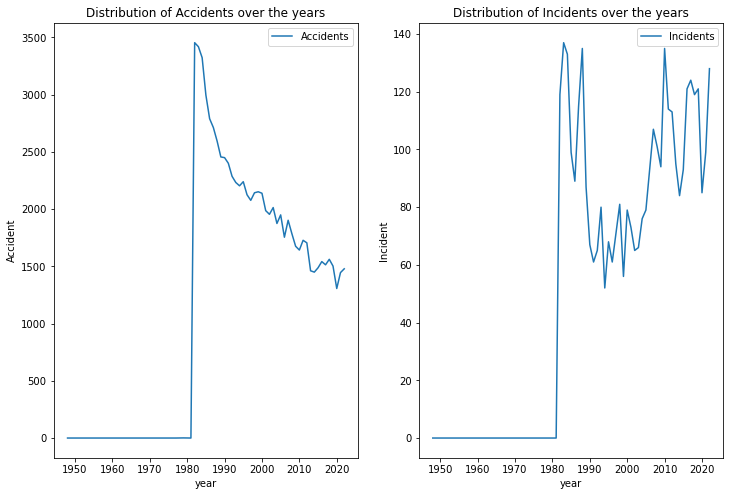

In [129]:
# plotting the distribution

# creating the figure and axis
fig, axes = plt.subplots(figsize=(12, 8), nrows=1, ncols=2)

# Plotting Accidents
sns.lineplot(
    data=accident_incident_years,
    x='year',
    y='Accident',
    label='Accidents',
    ax=axes[0]
)

# plotting incidents
sns.lineplot(
    data=accident_incident_years,
    x='year',
    y='Incident',
    label='Incidents',
    ax=axes[1]
)

axes[0].set_title('Distribution of Accidents over the years')
axes[1].set_title('Distribution of Incidents over the years')

plt.legend();

There was a significant increase in accident cases after 1980, but the number of cases has been decreasing ever since then.

There is also a significant increase on incidents from 1980 and seem to remain constant

** Our main interest is on AirPlanes so we can filter to only include Airplanes

In [130]:
df = df[df['Aircraft.Category'] == 'Airplane']
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year,Total.Injured,Aircraft.Name
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,missing,missing,...,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979,1.0,Mcdonnell Douglas_DC9
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,missing,missing,missing,BLACKBURN AG STRIP,...,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,0.0,Cessna_140
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,missing,missing,N58,HANOVER,...,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,0.0,Cessna_401B
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,missing,missing,missing,missing,...,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982,1.0,Bellanca_17-30A
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,missing,missing,T72,HEARNE MUNICIPAL,...,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982,1.0,Cessna_R172K


### Risk-Metrics

#### 1-Accident-Incident-occurences

we check to see the aircraft models with the lowest number of accident and incident cases

In [131]:
# the count of accidents and incidents for each model
accident_incident_count_df = df.groupby(
    'Aircraft.Name'
)['Investigation.Type'].value_counts().unstack(fill_value=0).reset_index()


accident_incident_count_df.columns.name = ""
accident_incident_count_df

,Aircraft.Name,Accident,Incident
0,177Mf Llc_PITTS MODEL 12,1,0
1,2007 Savage Air Llc_EPIC LT,0,1
2,2021Fx3 Llc_CCX-2000,2,0
3,3Xtrim_450 ULTRA,1,0
4,5 Rivers Llc_SQ-2,1,0
...,...,...,...
7488,Zlin_Z50,1,0
7489,Zodiac_601XL,1,0
7490,Zubair S Khan_RAVEN,1,0
7491,Zuber Thomas P_ZUBER SUPER DRIFTER,1,0


Adding new column for total count

In [132]:
accident_incident_count_df['total_count'] = (
    accident_incident_count_df['Accident'] +
    accident_incident_count_df['Incident']
)

Getting the lowest risk According to Accident and incident count
- Should have the lowest total count
- lowest accidents(preferably no accidents)
- Fewest Incidents

In [133]:
lowest_count = accident_incident_count_df['total_count'].min()
lowest_count

1

Lowest total count is 1 therefore we filter to get those models with lowest count and no accidents

In [134]:
first_metric_lowest_risk = accident_incident_count_df.loc[
    (accident_incident_count_df['total_count'] == 1) &
    (accident_incident_count_df['Accident'] == 0)
]

first_metric_lowest_risk

,Aircraft.Name,Accident,Incident,total_count
1,2007 Savage Air Llc_EPIC LT,0,1,1
6,777_FF2,0,1,1
269,Airbus Industrie_300B4-200,0,1,1
274,Airbus Industrie_A300,0,1,1
276,Airbus Industrie_A300B4-622R,0,1,1
...,...,...,...,...
7005,Tomisin Thomas J_RUTAN LONG EZ,0,1,1
7023,Ttx Air Llc_LANCAIR,0,1,1
7032,Turbo Thrush_S2R,0,1,1
7047,Ultramagic Sa_T210,0,1,1


In [135]:
first_metric_final_airplanes = list(first_metric_lowest_risk['Aircraft.Name'])

We now have the models which have recorded no accidents only incidents.

This are the lowest risk according to the first metric

Filtering entire df to contain only our lowest risk airplanes according to first risk metric

In [136]:
first_metric_df = df.set_index('Aircraft.Name').loc[first_metric_final_airplanes]

#### 2-Injuries

Checking to eliminate the models with high number of incident causing injuries

In [137]:
df['Injury.Severity'].value_counts()

Fatal          26212
missing          812
Incident         244
Minor            165
Serious          127
Unavailable       20
Name: Injury.Severity, dtype: int64

##### Trying to understand the Unavailable column

In [138]:
unavailable_df = df[df['Injury.Severity'] == 'Unavailable']
unavailable_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year,Total.Injured,Aircraft.Name
41656,20001208X07697,Accident,DCA97WA043,1997-04-27,"JINAN, CHINA",China,missing,missing,missing,missing,...,0.0,0.0,5.0,UNK,missing,Foreign,missing,1997,0.0,Mcdonnell Douglas_MD-82
42287,20001208X08352,Accident,DCA97WA054,1997-07-21,"SOUTHERN THAILA, Thailand",Thailand,missing,missing,missing,missing,...,0.0,0.0,5.0,UNK,missing,Foreign,missing,1997,0.0,Learjet_LR-31
42847,20001208X08992,Accident,DCA98WA082,1997-10-09,"HARBIN, CHINA",China,missing,missing,missing,missing,...,0.0,0.0,5.0,UNK,missing,Foreign,missing,1997,0.0,Cessna_650-0220
42935,20001208X08991,Accident,DCA98WA005,1997-10-24,"MONTEVIDEO, URUGUAY",Uruguay,missing,missing,missing,missing,...,0.0,0.0,5.0,UNK,missing,Foreign,missing,1997,0.0,Mcdonnell Douglas_MD-11
43693,20001211X09838,Accident,DCA98WA050,1998-04-12,"ALMA-ATA, KAZAKHSTAN",Kazakhstan,missing,missing,missing,missing,...,0.0,0.0,5.0,UNK,missing,Foreign,missing,1998,0.0,Boeing_737-200


In [139]:
unavailable_df['Investigation.Type'].value_counts()

Accident    20
Name: Investigation.Type, dtype: int64

only accidents are involved in this category

In [140]:
unavailable_df['Total.Injured'].value_counts()

0.0    20
Name: Total.Injured, dtype: int64

    Also no injuries, so we can conclude that the 'Unavailable' category is for accident cases with no injuries

##### Understanding the Incident Category

In [141]:
incident_cat_df = df[df['Injury.Severity'] == 'Incident']
incident_cat_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year,Total.Injured,Aircraft.Name
23,20020917X02333,Incident,LAX82IA034,1982-01-03,"VAN NUYS, CA",United States,missing,missing,VNY,VAN NUYS,...,0.0,0.0,1.0,VMC,Approach,Probable Cause,03-01-1983,1982,0.0,Piper_PA-24-180
40,20020917X01764,Incident,ATL82IA029,1982-01-05,"PENSACOLA, FL",United States,missing,missing,missing,missing,...,0.0,0.0,1.0,VMC,Cruise,Probable Cause,05-01-1983,1982,0.0,Rockwell_114
79,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,missing,missing,ORD,CHICAGO O'HARE INTER'L,...,0.0,0.0,149.0,UNK,Cruise,Probable Cause,12-01-1983,1982,0.0,Lockheed_L-1011
80,20020917X01765,Incident,ATL82IA034,1982-01-12,"CLARKSBURG, WV",United States,missing,missing,CKB,BENEDUM,...,0.0,0.0,2.0,VMC,Taxi,Probable Cause,12-01-1983,1982,0.0,Embraer_EMB-110P1
119,20020917X01766,Incident,ATL82IA038,1982-01-19,"WASHINGTON, DC",United States,missing,missing,IAD,missing,...,0.0,0.0,1.0,IMC,Descent,Probable Cause,19-01-1983,1982,0.0,De Havilland_DHC-6-300


In [142]:
incident_cat_df['Investigation.Type'].value_counts()

Incident    244
Name: Investigation.Type, dtype: int64

Only involve incident cases

In [143]:
incident_cat_df['Total.Injured'].value_counts()

0.0      229
1.0        8
2.0        3
380.0      1
14.0       1
33.0       1
17.0       1
Name: Total.Injured, dtype: int64

mostly no number of injuries

In [144]:
incident_cat_df[incident_cat_df['Total.Injured'] > 0][
    ['Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries']
]

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
425,0.0,0.0,1.0
506,1.0,0.0,0.0
1347,0.0,0.0,17.0
2282,0.0,0.0,1.0
2335,0.0,0.0,33.0
2394,0.0,0.0,1.0
2614,0.0,1.0,1.0
3170,0.0,0.0,1.0
3298,0.0,0.0,1.0
3578,0.0,0.0,14.0


For cases of injuries there are only minor injuries in the Incident Category

So we can conclude that for the 'Incident' category it involves Incident cases with no or minor injuries

This is the favourable category to chooose as the lowest risk

##### Filtering To get the Incident category

In [146]:
second_metric_df = first_metric_df[
    first_metric_df['Injury.Severity'] == 'Incident'
]

second_metric_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year,Total.Injured
Aircraft.Name,,,,,,,,,,,,,,,,,,,,,
Airbus Industrie_300B4-200,20081003X63346,Incident,ENG05WA019,2005-06-29,"Amsterdam, The Netherlands, Netherlands",Netherlands,missing,missing,EHAM,Amsterdam Inter. Schipol,...,0.0,0.0,0.0,279.0,missing,missing,Foreign,20-10-2009,2005,0.0
Airbus Industrie_A300,20001211X10544,Incident,DCA98WA066,1998-07-09,"LONDON, United Kingdom",United Kingdom,missing,missing,missing,missing,...,0.0,0.0,0.0,1.0,UNK,missing,Foreign,missing,1998,0.0
Bac_1-11-204AF,20020917X03096,Incident,CHI82IA179,1982-05-21,"DAYTON, OH",United States,missing,missing,DAY,COX INTERNATIONAL,...,0.0,0.0,0.0,48.0,IMC,Landing,Probable Cause,21-05-1983,1982,0.0
Beech_18,20020917X02892,Incident,ATL82IA154,1982-06-06,"MACON, GA",United States,missing,missing,MCN,LEWIS B. WILSON,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,06-06-1983,1982,0.0
Beech_65-88,20020917X01900,Incident,CHI82IA102,1982-03-25,"KALAMAZO, MI",United States,missing,missing,AZO,KALAMAZOO,...,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,25-03-1983,1982,0.0
